In [1]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns

# Preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder


# For build pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline


# Machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor , AdaBoostRegressor

# for plot decision tree
from sklearn import tree

# Model selection libraries
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# importing XGB regressor
from xgboost import XGBRegressor

# Metrics libraries for model evaluation
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

# Warnings module handles warnings in Python
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'D:\DATA SCIENCE\Data Analytics work\DATASETS\IPL.csv')
print(f"Dataset successfully Imported of Shape : {data.shape}")


Dataset successfully Imported of Shape : (76014, 15)


In [3]:
data.head()

,mid,date,venue,batting_team,bowling_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
data.tail()

,mid,date,venue,batting_team,bowling_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
76009,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129
76013,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,129,8,19.6,47,1,47,13,129


In [5]:
data.shape

(76014, 15)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   batting_team    76014 non-null  object 
 4   bowling_team    76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [7]:
data.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [8]:
data.duplicated().sum()

0

In [9]:
data.isnull().sum()

mid               0
date              0
venue             0
batting_team      0
bowling_team      0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

<Axes: >

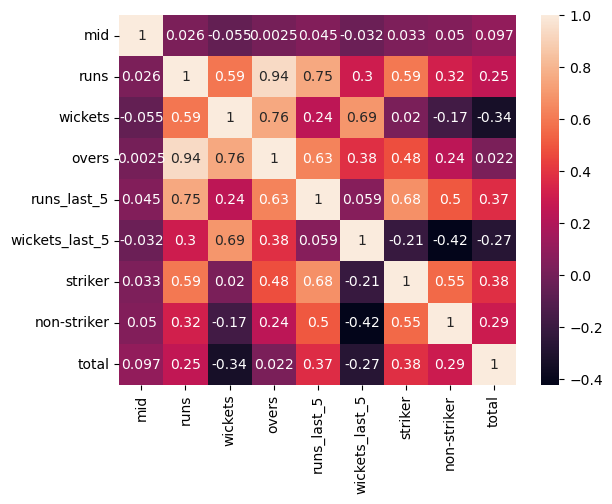

In [10]:
from seaborn import heatmap
heatmap(data=data.corr(), annot=True)

# DATA CLEANING

In [11]:
ipl_data=data.copy()

In [12]:
ipl_data.sample(5)

,mid,date,venue,batting_team,bowling_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
36346,295,2012-05-12,Eden Gardens,Mumbai Indians,Kolkata Knight Riders,HH Gibbs,R Bhatia,57,1,7.3,41,0,28,26,182
24324,197,2011-04-25,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Pune Warriors,MS Dhoni,R Sharma,90,2,14.1,26,2,41,15,142
35719,290,2012-05-08,Subrata Roy Sahara Stadium,Pune Warriors,Rajasthan Royals,MJ Clarke,STR Binny,35,2,6.1,29,2,16,0,125
21529,174,2011-04-10,Feroz Shah Kotla,Delhi Daredevils,Mumbai Indians,M Morkel,SL Malinga,88,7,15.3,29,3,2,0,95
47863,389,2013-05-26,Eden Gardens,Mumbai Indians,Chennai Super Kings,KD Karthik,MM Sharma,12,2,2.2,12,2,4,2,148


In [13]:
columns_to_remove=['mid','venue','batsman','bowler','striker','non-striker']
ipl_data.drop(labels=columns_to_remove,axis=1,inplace=True)


In [14]:
ipl_data['batting_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [15]:
# Keeping only consistent teams
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [16]:
ipl_data = ipl_data[(ipl_data['batting_team'].isin(consistent_teams)) & (ipl_data['bowling_team'].isin(consistent_teams))]

In [17]:
# Removing the first 5 overs data in every match
ipl_data = ipl_data[ipl_data['overs']>=5.0]

In [18]:
ipl_data.shape

(40108, 9)

In [19]:
# Converting the column 'date' from string into datetime object

ipl_data['date']= pd.to_datetime(ipl_data['date'])

In [20]:
ipl_data['crr'] =ipl_data['runs']/ipl_data['overs']

In [21]:
# Split the 'overs' column into its integer and decimal parts
overs_int = ipl_data['overs'].apply(lambda x: int(x))
overs_dec = ipl_data['overs'].apply(lambda x: float('0.' + str(x).split('.')[1]))

# Calculate the number of balls left in each over
balls_left = (20 - overs_int - 1) * 6 + (6 - ((overs_dec * 10) % 10 + 1))

# Add the 'balls left' column to the DataFrame
ipl_data['balls_left'] = balls_left.astype(int)

In [22]:
ipl_data['wickets_left'] = 10-ipl_data['wickets']

In [23]:
ipl_data.reset_index(drop=True, inplace=True)

In [24]:
ipl_data.head()

,date,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total,crr,balls_left,wickets_left
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222,11.960784,88,10
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222,11.730769,87,9
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222,11.509434,86,9
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222,11.296296,85,9
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222,11.090909,84,9


# Pre-Processing and Model Implementation

In [25]:
# Splitting the data into train and test set

X_train = ipl_data.drop(labels='total', axis=1)[ipl_data['date'].dt.year <= 2015]
X_test = ipl_data.drop(labels='total', axis=1)[ipl_data['date'].dt.year >= 2016]
y_train = ipl_data[ipl_data['date'].dt.year <= 2015]['total'].values
y_test = ipl_data[ipl_data['date'].dt.year >= 2016]['total'].values

In [26]:
X = ipl_data.drop(columns=['total'])
y = ipl_data['total']

In [27]:
# calling train_test_split() to get the training and testing data.

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# split sizes
print(X_train.shape)
print(X_test.shape)

(32086, 11)
(8022, 11)


In [28]:
# Removing the 'date' column

X_train.drop(labels='date', axis=1, inplace=True)
X_test.drop(labels='date', axis=1, inplace=True)

In [29]:
# split sizes
print(X_train.shape)
print(X_test.shape)

(32086, 10)
(8022, 10)


In [30]:
trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),[0,1])
]
,remainder='passthrough')

#  Linear Regression

In [31]:
pipe1 = Pipeline(steps=[
    ('step1',trf),
    ('step2',StandardScaler()),
    ('step3',LinearRegression())
])


# fit the pipeline on training dataset
pipe1.fit(X_train,y_train)

# predict the train and test dataset 
y_pred_train = pipe1.predict(X_train)
y_pred = pipe1.predict(X_test)

# LinearRegression model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.6629135049518473
Adjusted R2 score 0.6628084117343732


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.6738797599141155
Adjusted R2 score 0.6734726693635152


The performance metrics
-----------------------------------------
MAE 12.805900497171478
MSE 295.193015345788
RMSE 17.18118201247481


# Decision Tree

In [32]:
# apply DecisionTreeRegressor algorithm with hyperparameter tuning

# giving parameters
parameters = {
    'criterion':['squared_error'],                    # 'friedman_mse', 'absolute_error'
    'splitter' :['best'],                             # random
    'max_depth' :[7],                                 # 4,5,6,7,8,9,None
    'max_features' :[1.0]                             # 0.25,0.50,0.75,0.85
}

# we use gridsearchCV because the dataset is not that big
dtr = GridSearchCV(DecisionTreeRegressor(), param_grid=parameters , cv=5, n_jobs=-1)


pipe2 = Pipeline(steps=[
    ('step1',trf),
    ('step3',dtr)
])


# fit the pipeline on training dataset
pipe2.fit(X_train,y_train)

# predict the train and test dataset 
y_pred_train = pipe2.predict(X_train)
y_pred = pipe2.predict(X_test)


# DecisionTreeRegressor model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print("The best parameters is", dtr.best_params_)
print('cross-validation score', dtr.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.7163238893459634
Adjusted R2 score 0.7162354478461492


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.720177664756064
Adjusted R2 score 0.719828367121257


Cross-validation score and best params
-----------------------------------------
The best parameters is {'criterion': 'squared_error', 'max_depth': 7, 'max_features': 1.0, 'splitter': 'best'}
cross-validation score 0.6951140438715655


The performance metrics
-----------------------------------------
MAE 11.753795385109736
MSE 253.28571719438236
RMSE 15.914952629347734


# RandomForestRegressor

In [33]:
# apply RandomForestRegressor algorithm


# giving parameters
parameters = {
    'n_estimators':[100],                        
    'max_features' :['sqrt']                   
}
 
# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
rfr = GridSearchCV(RandomForestRegressor(), param_grid=parameters , cv=5, n_jobs=-1)

pipe4 = Pipeline(steps=[
    ('step1',trf),
    ('step3',rfr)
])

# fit the pipeline on training dataset
pipe4.fit(X_train,y_train)

# predict the train and test dataset 
y_pred_train = pipe4.predict(X_train)
y_pred = pipe4.predict(X_test)

# RandomForestRegressor model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))
print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print("The best parameters is", rfr.best_params_)
print('cross-validation score', rfr.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.9904484042603374
Adjusted R2 score 0.9904454263661083


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.9385192145083814
Adjusted R2 score 0.9384424690515201


Cross-validation score and best params
-----------------------------------------
The best parameters is {'max_features': 'sqrt', 'n_estimators': 100}
cross-validation score 0.9220243955057257


The performance metrics
-----------------------------------------
MAE 4.501435394925859
MSE 55.65032838905969
RMSE 7.459914770897834


# XGBREGRESSOR

In [34]:
# apply XGBRegressor algorithm


# giving parameters
parameters = {
    'max_depth' :[6]                                                         
}
 
# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
xgbr = GridSearchCV(XGBRegressor(objective='reg:squarederror'), param_grid=parameters , cv=5, n_jobs=-1)

pipe5 = Pipeline(steps=[
    ('step1',trf),
    ('step3',xgbr)
])

# fit the pipeline on training dataset
pipe5.fit(X_train,y_train)

# predict the train and test dataset 
y_pred_train = pipe5.predict(X_train)
y_pred = pipe5.predict(X_test)

# GradientBoostingRegressor model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print("The best parameters is", xgbr.best_params_)
print('cross-validation score', xgbr.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.9063966039146877
Adjusted R2 score 0.9063674212502807


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.8736689933815254
Adjusted R2 score 0.8735112964565241


Cross-validation score and best params
-----------------------------------------
The best parameters is {'max_depth': 6}
cross-validation score 0.8638022894292995


The performance metrics
-----------------------------------------
MAE 7.458634366301996
MSE 114.35055599601942
RMSE 10.693481939762156


# GradientBoostingRegressor

In [35]:
# apply GradientBoostingRegressor algorithm with hyperparameter tuning as step2


# giving parameters
parameters = {
    'n_estimators' :[100],                                     
    'learning_rate' :[0.1],                                       
    'max_depth' : [3]                                                          
}
 
# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
gbr = GridSearchCV(GradientBoostingRegressor(), param_grid=parameters , cv=5, n_jobs=-1)

pipe6 = Pipeline(steps=[
    ('step1',trf),
    ('step2',StandardScaler()),
    ('step3',gbr)
])

# fit the pipeline on training dataset
pipe6.fit(X_train,y_train)

# predict the train and test dataset 
y_pred_train = pipe6.predict(X_train)
y_pred = pipe6.predict(X_test)

# GradientBoostingRegressor model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))
print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print("The best parameters is", gbr.best_params_)
print('cross-validation score', gbr.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.7240368749171924
Adjusted R2 score 0.7239508380894191


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.7272494580142281
Adjusted R2 score 0.7269089879830388


Cross-validation score and best params
-----------------------------------------
The best parameters is {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
cross-validation score 0.717727667589877


The performance metrics
-----------------------------------------
MAE 11.569347205147967
MSE 246.8845690312701
RMSE 15.712560868021168


# Conclusion -
 After conducting a thorough analysis, we have identified XGBRegressor and RandomForestRegressor as the top-performing models in our study. Both models demonstrated high r2 scores during cross-validation.

However, upon further evaluation, we found that the RandomForestRegressor demonstrated slightly better accuracy than XGBRegressor. While both models performed well, we did observe slight overfitting with the RandomForestRegressor on our training data.

Given these observations, we have ultimately decided to deploy the XGBRegressor pipeline for our task, as it represents a strong balance between accuracy and generalizability.

We are confident that the XGBRegressor pipeline will produce reliable and accurate predictions, and we recommend its use for further analysis and decision-making.

In [36]:
import pickle

pickle.dump(pipe5,open('pipe.pkl','wb'))